In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = df.target

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [10]:
model.score(X_test, Y_test)

0.9666666666666667

In [11]:
# for 20 trees
model1 = RandomForestClassifier(n_estimators=20)
model1.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20)

In [12]:
model1.score(X_test, Y_test)

0.9666666666666667

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


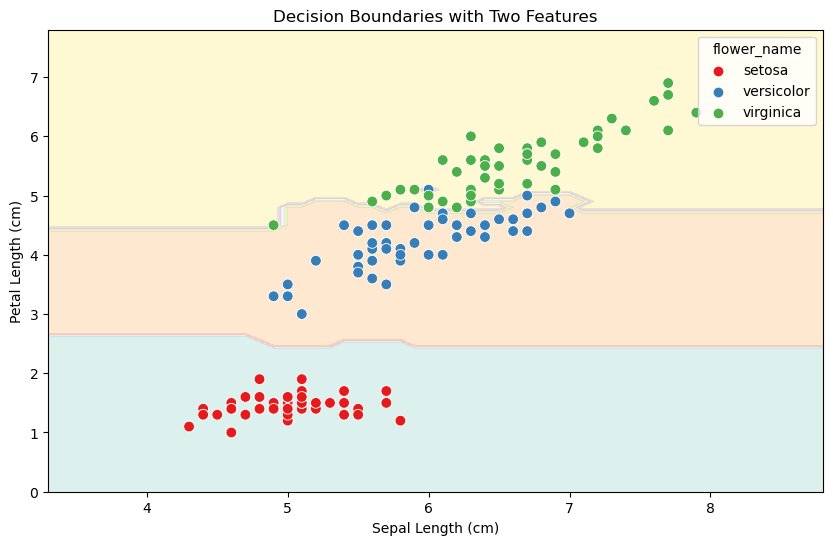

In [14]:
import numpy as np

# Select two features for visualization
X_reduced = X[['sepal length (cm)', 'petal length (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Define a mesh to plot decision boundaries
x_min, x_max = X_reduced.iloc[:, 0].min() - 1, X_reduced.iloc[:, 0].max() + 1
y_min, y_max = X_reduced.iloc[:, 1].min() - 1, X_reduced.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set3')
sns.scatterplot(x=X_reduced.iloc[:, 0], y=X_reduced.iloc[:, 1], hue=df['flower_name'], s=60, palette='Set1')
plt.title("Decision Boundaries with Two Features")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show()

